# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key text.latex.preview in file C:\Users\danie\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\danie\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users

In [3]:
# Read your api key environment variable
load_dotenv()
news_api_key = os.getenv("NEWS_API_KEY")
print(news_api_key) 

e793bc4c3c6c44239e4e28c9dda06e92


In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=news_api_key)

In [5]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin",language="en",sort_by="relevancy")

In [6]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q='ethereum',language="en",sort_by="relevancy")

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "Text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc = pd.DataFrame(bitcoin_sentiments)
btc.head()

,Text,Compound,Positive,Negative,Neutral
0,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876
1,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871
2,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831
3,British entrepreneur and financier Richard ODe...,0.6808,0.185,0.000,0.815
4,"Over the last five years, about 25,000 of thos...",-0.4939,0.000,0.091,0.909


In [8]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
    
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth= pd.DataFrame(eth_sentiments)
eth.head()

,Compound,Positive,Negative,Neutral,Text
0,-0.2023,0.039,0.062,0.899,If people who buy cryptocurrencies intended on...
1,-0.2498,0.000,0.059,0.941,"Technical analysis isnt a perfect tool, but it..."
2,0.0000,0.000,0.000,1.000,This enables an L1 platform to bootstrap its n...
3,0.0000,0.000,0.000,1.000,"The means-and-ends moralists, or non-doers, al..."
4,0.6705,0.188,0.000,0.812,Coinbase reported that the share of trading vo...


In [9]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.151985,0.088850,0.047600,0.863600
std,0.468680,0.059173,0.059001,0.062236
min,-0.709600,0.000000,0.000000,0.729000
25%,-0.272000,0.045750,0.000000,0.829500
50%,0.261600,0.073000,0.000000,0.862500
75%,0.585900,0.145250,0.090250,0.901500
max,0.778300,0.185000,0.169000,1.000000


In [10]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.054765,0.053050,0.030550,0.916450
std,0.361855,0.073697,0.049529,0.087686
min,-0.680800,0.000000,0.000000,0.766000
25%,-0.102700,0.000000,0.000000,0.822500
50%,0.000000,0.019500,0.000000,0.942500
75%,0.152575,0.063250,0.059750,1.000000
max,0.834100,0.234000,0.174000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [50]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("t")
stop.append("it")
stop.append("s")
stop.append("'s")
stop.append("'d")
stop.append("n't")
stop.append('…')
stop.append("\'")
stop.append('’')
stop.append("chars")
stop.append("'")
stop.append("reuters")
stop.append('alex')
stop.append('castro')
stop.append('illustration')
stop.append('el')
stop.append('salvador')
stop.append('feb')
stop.append('time')
stop.append("newsletter")
stop.append("lichtensteins")
stop.append("mr.")
stop.append("arent")
stop.append("paying")
stop.append("even")
stop.append("attention")
stop.append("might")
stop.append("noticed")
stop.append("last")
stop.append("week")
stop.append("total")
stop.append("version")
stop.append("article")
stop.append("published")
stop.append("subscribe")
stop.append("weekly")
stop.append("guide")
stop.append("find")
stop.append("issue")
stop.append("324")
stop.append("million")
stop.append("getty")
stop.append("images")
stop.append("picture")
stop.append("images")
stop.append("made")
stop.append("nearly")
stop.append("intended")
stop.append("non")
stop.append("end")
stop.append("said")
stop.append("making")
stop.append("tr")
stop.append("known")
stop.append("announced")
stop.append("based")
stop.append("always")
stop.append("via")
stop.append("kickbacks")
stop.append("religion")
stop.append("may")
stop.append("need")
stop.append("Mr.")
stop.append("Pled")
stop = set(stop)

In [51]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
   
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation from text
    words = list(filter(lambda t: t not in punctuation, words))
   
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
   
    return tokens

In [52]:
# Create a new tokens column for Bitcoin
btc["tokens"] = btc.Text.apply(tokenizer)
btc.head()

,Text,Compound,Positive,Negative,Neutral,tokens
0,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876,"[Bitcoin, cryptocurrencies, value, plummeted, ..."
1,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871,"[Israeli, national, Tal, Prihar, pled, guilty,..."
2,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831,"[Netflix, docuseries, one, worst, rapper, Coin..."
3,British entrepreneur and financier Richard ODe...,0.6808,0.185,0.000,0.815,"[British, entrepreneur, financier, Richard, OD..."
4,"Over the last five years, about 25,000 of thos...",-0.4939,0.000,0.091,0.909,"[five, year, 25,000, Bitcoin, transferred, wal..."


In [53]:
# Create a new tokens column for Ethereum
eth["tokens"] = eth.Text.apply(tokenizer)
eth.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,-0.2023,0.039,0.062,0.899,If people who buy cryptocurrencies intended on...,"[people, buy, cryptocurrencies, hold, speculat..."
1,-0.2498,0.000,0.059,0.941,"Technical analysis isnt a perfect tool, but it...","[Technical, analysis, isnt, perfect, tool, poi..."
2,0.0000,0.000,0.000,1.000,This enables an L1 platform to bootstrap its n...,"[enables, L1, platform, bootstrap, national, e..."
3,0.0000,0.000,0.000,1.000,"The means-and-ends moralists, or non-doers, al...","[means-and-ends, moralist, non-doers, end, wit..."
4,0.6705,0.188,0.000,0.812,Coinbase reported that the share of trading vo...,"[Coinbase, reported, share, trading, volume, e..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [54]:
from collections import Counter
from nltk import ngrams

In [55]:
# Generate the Bitcoin N-grams where N=2
N=2
grams=ngrams(tokenizer(btc.Text.str.cat()), N)
Counter(grams).most_common(20)

[(('Bitcoin', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'value'), 1),
 (('value', 'plummeted'), 1),
 (('plummeted', 'value'), 1),
 (('value', 'market'), 1),
 (('market', 'tumbling'), 1),
 (('tumbling', 'high'), 1),
 (('high', '3'), 1),
 (('3', 'tr…'), 1),
 (('tr…', '+4782'), 1),
 (('+4782', 'Israeli'), 1),
 (('Israeli', 'national'), 1),
 (('national', 'Tal'), 1),
 (('Tal', 'Prihar'), 1),
 (('Prihar', 'pled'), 1),
 (('pled', 'guilty'), 1),
 (('guilty', 'routing'), 1),
 (('routing', 'money'), 1),
 (('money', 'Bitcoin'), 1),
 (('Bitcoin', 'shell'), 1)]

In [56]:
# Generate the Ethereum N-grams where N=2
N=2
grams=ngrams(tokenizer(eth.Text.str.cat()), N)
Counter(grams).most_common(20)

[(('Metaverse', 'future'), 3),
 (('past', 'issue'), 3),
 (('trading', 'volume'), 2),
 (('profile', 'picture'), 2),
 (('Online', 'thief'), 2),
 (('worth', 'Hackers'), 2),
 (('cryptocurrency', 'Wormhole'), 2),
 (('Wormhole', 'developer'), 2),
 (('future', 'Internet'), 2),
 (('Internet', 'past'), 2),
 (('people', 'buy'), 1),
 (('buy', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'hold'), 1),
 (('hold', 'speculative'), 1),
 (('speculative', 'investment'), 1),
 (('investment', 'real'), 1),
 (('real', 'crypto'), 1),
 (('crypto', 'wallet'), 1),
 (('wallet', 'Exchanges'), 1),
 (('Exchanges', 'online'), 1)]

In [57]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [58]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.Text.str.cat())
token_count(all_tokens,10)

[('Bitcoin', 13),
 ('cryptocurrency', 4),
 ('money', 3),
 ('one', 3),
 ('wallet', 3),
 ('bitcoin', 3),
 ('crypto', 3),
 ('cryptocurrencies', 2),
 ('value', 2),
 ('Verge', 2)]

In [59]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth.Text.str.cat())
token_count(all_tokens,10)

[('cryptocurrency', 6),
 ('Ethereum', 4),
 ('ethereum', 4),
 ('investment', 3),
 ('crypto', 3),
 ('platform', 3),
 ('token', 3),
 ('year', 3),
 ('popular', 3),
 ('new', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

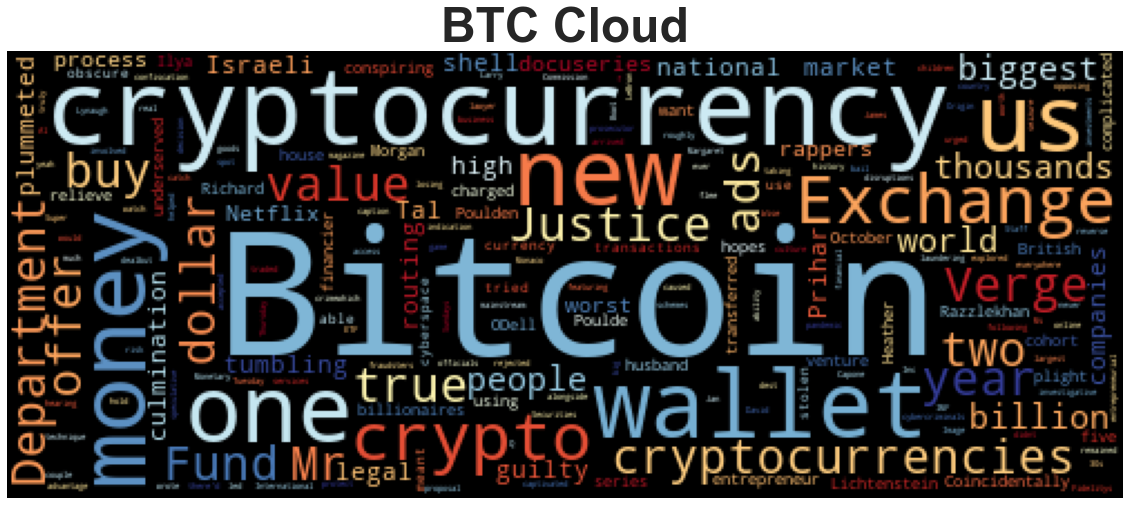

In [61]:
# Generate the Bitcoin word cloud
def wordcloud(text,title=""):
    df_cloud = WordCloud(stopwords=stop, width=500,colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize":48,"fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

wordcloud(btc.Text.str.cat(),title = "BTC Cloud")

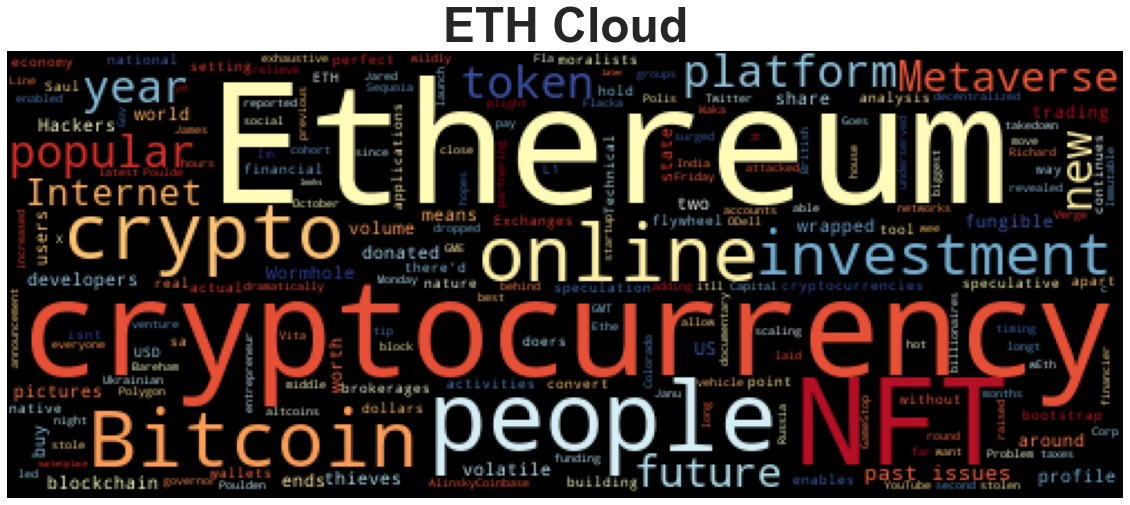

In [62]:
# Generate the Ethereum word cloud
wordcloud(eth.Text.str.cat(), title = "ETH Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [63]:
import spacy
from spacy import displacy

In [64]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [65]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [66]:
# Concatenate all of the Bitcoin text together
all_btc = btc.Text.str.cat()

In [67]:
# Run the NER processor on all of the text
btc_doc = nlp(all_btc)

# Add a title to the document
btc_doc.user_data["title"] = "BTC NER"

In [68]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [69]:
# List all Entities
btc_entities = [ent.text for ent in btc_doc.ents]
btc_entities

['last week',
 '3',
 'Tal Prihar',
 'Illustration',
 'Alex Castro',
 'Verge',
 'two-year',
 'about one',
 'Ilya Lichtenstein',
 'this week',
 'Richard ODell',
 'house',
 'October',
 'Poulde',
 'the last five years',
 'about 25,000',
 'Lichtensteins',
 'the Department of Justice',
 'Monaco',
 'Al Capone',
 'Margaret Lynaugh',
 'Bitcoin',
 'El Salvador',
 'US',
 'The International Monetary Fund',
 'El Salvador',
 'Reuters',
 'Jan 26',
 'Reuters',
 'The U.S. Securities and Exchange Commission',
 'Thursday',
 'ETF',
 'Fidelitys Wise Origin Bitcoin',
 '+202',
 'Super Bowl',
 'Larry David',
 'LeBron James',
 '+3454',
 'one',
 'Tuesday',
 '$4.5 billion',
 'Lichtensteins',
 'Feb. 1',
 'roughly $3.6 billion',
 'one 2020',
 'Reuters',
 'thousands',
 '202',
 '4',
 'Reuters',
 '8.82%',
 '40,611.4',
 '2202',
 'Friday',
 '3,291.29',
 'Bitcoin',
 '23.2%',
 '22',
 'Reuters',
 '2021',
 'thousands',
 'YouTube',
 'Alex Castro',
 'Verge',
 'BitConnect',
 'Bitcoin',
 'Bloombergs Lorcan Roche Kelly',
 'firs

---

### Ethereum NER

In [70]:
# Concatenate all of the Ethereum text together
all_eth = eth.Text.str.cat()

In [71]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth)

# Add a title to the document
eth_doc.user_data["title"] = "ETH NER"

In [72]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [73]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents]
eth_entities

['Ethereum',
 'ETH-USD',
 'Crypto',
 '-- Saul AlinskyCoinbase',
 'last year',
 'Between 2020 and 2021',
 'Colorado',
 'the middle of this year',
 'US',
 'Jared Polis',
 'James Bareham',
 'More than $15 million',
 'More than $15 million',
 'Ukrainian',
 'Russia',
 'night',
 'Twitter',
 'Ethereum',
 'second',
 'two months',
 'NFT',
 '7',
 'Reuters',
 'Monday',
 '$450 million',
 'Sequoia Capital India',
 'nearly $324 million',
 'Getty Images',
 'more than $324 million',
 'Wormhole',
 '120,000',
 'wEth',
 'Ethereum',
 'nearly $324 million',
 'Getty Images',
 'more than $324 million',
 'Wormhole',
 'two hours',
 'YouTube',
 'Waka Flacka Fla',
 'Richard ODell',
 'house',
 'October',
 'Poulde',
 '4',
 'Reuters',
 '8.82%',
 '40,611.4',
 '2202',
 'Friday',
 '3,291.29',
 'Bitcoin',
 '23.2%',
 'TIME',
 'weekly',
 'Vita',
 'TIME',
 'weekly',
 'TIME',
 'weekly',
 '3',
 'Reuters',
 'NFT',
 'later this year',
 '10',
 'Reuters',
 'Thursday',
 'UK',
 'today']

---